# Homework 3 (Tutorial 7)

##MA course in Artificial Intelligence 2022/2023

insert your "Name Surname"

In [6]:
# !rm -r AI_USI_MA/
!git clone https://github.com/UmbertoJr/AI_USI_MA.git

Cloning into 'AI_USI_MA'...
remote: Enumerating objects: 398, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 398 (delta 53), reused 99 (delta 25), pack-reused 265
Receiving objects: 100% (398/398), 13.97 MiB | 15.89 MiB/s, done.
Resolving deltas: 100% (183/183), done.


name: eil76
nPoints: 76
best_sol: 538.0


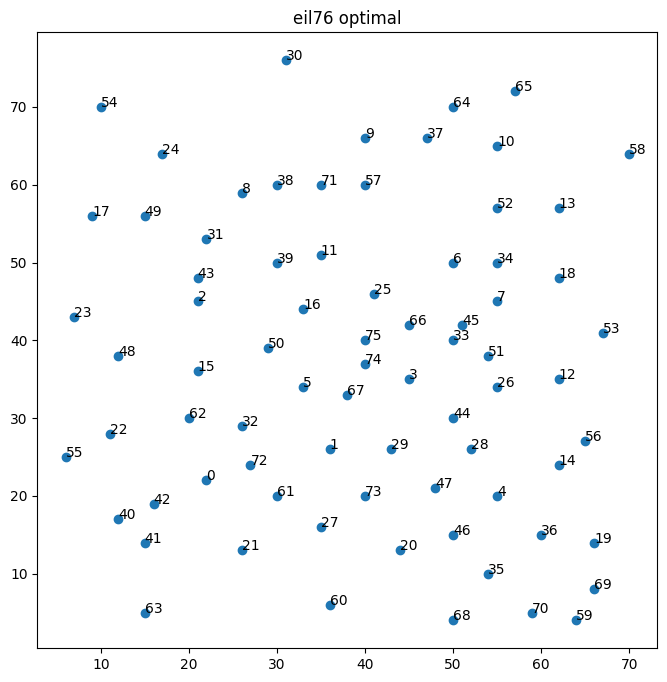

In [7]:
# Imports

from AI_USI_MA.IO_manager.io_tsp import TSP_Instance_Creator
# if you are running from your local remove the prefix AI2020 (comment the previous line and uncomment the following line)
# from IO_manager.io_tsp import TSP_Instance_Creator

ic = TSP_Instance_Creator("standard", 'eil76.tsp')
ic.print_info()
ic.plot_data()

name: ch130
nPoints: 130
best_sol: 6110.0


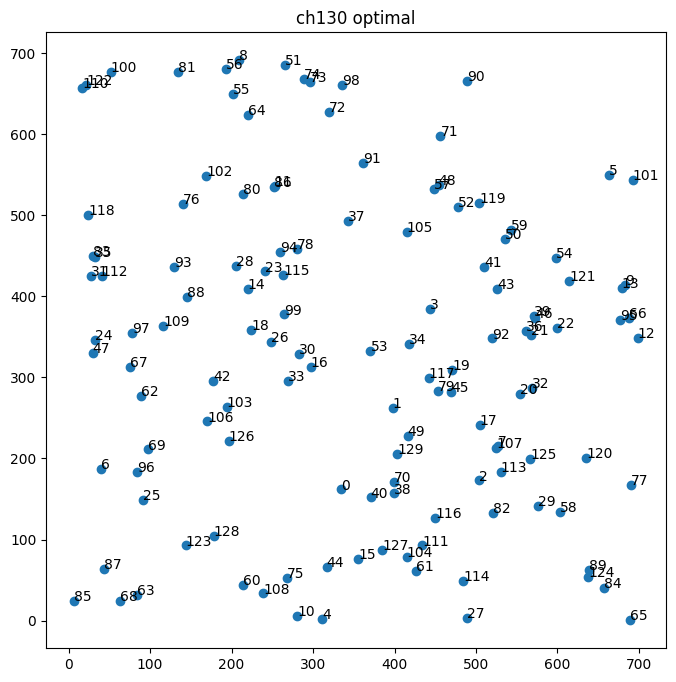

In [8]:
ic = TSP_Instance_Creator("standard", 'ch130.tsp')
ic.print_info()
ic.plot_data()

name: d198
nPoints: 198
best_sol: 15780.0


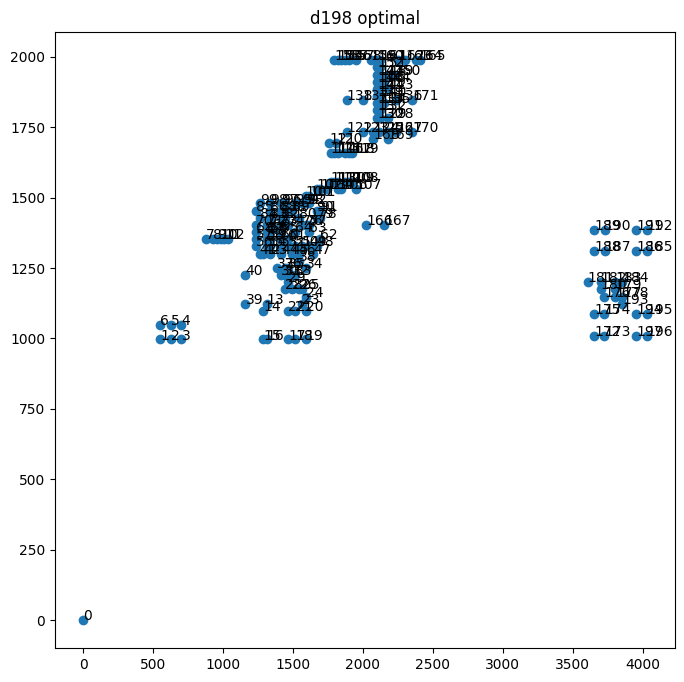

In [9]:
ic = TSP_Instance_Creator("standard", 'd198.tsp')
ic.print_info()
ic.plot_data()

name: myTSP_dim10
nPoints: 10
best_sol: 2732.0


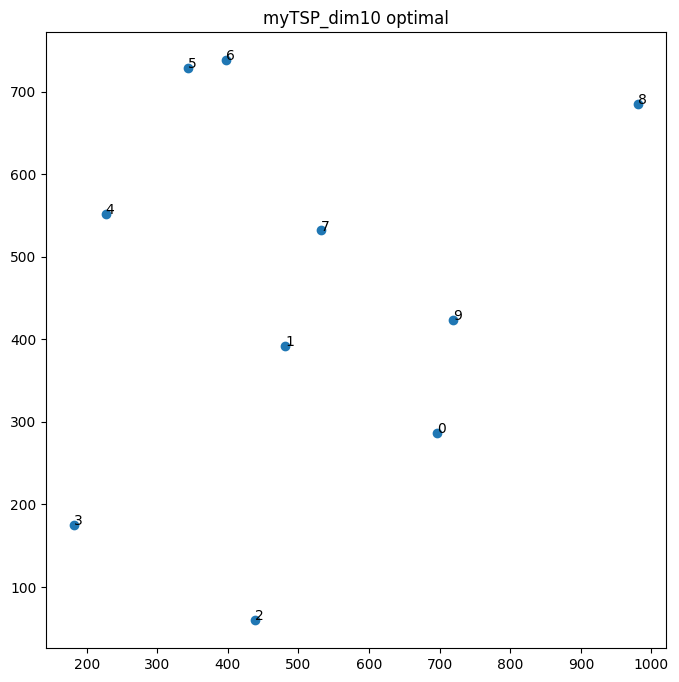

In [10]:
ic = TSP_Instance_Creator("standard", 'myTSP_dim10.tsp')
ic.print_info()
ic.plot_data()

In [11]:
import numpy as np
from AI_USI_MA.solvers.local_search import twoOpt
from AI_USI_MA.solvers.constructive_algorithms import nn

# nn takes as input the distance matrix and returns
# the tour and the length constructed with nearest neighbor, i.e.   tour, len_t = nn(dist_mat)

# twoOpt takes as input the solution, the actual_len and the distance matrix
# and returns the tour and the length created with 2-opt, i.e.     tour, lent_t = twoOpt(solution, actual_len, dist_mat)

class ACS:
  m = 10
  beta = 2
  alpha = rho = 0.1
  cl = 20 # or 15

  @staticmethod
  def take_candidates(j, dist_mat):
    return list(np.argsort(dist_mat[j])[1:ACS.cl+1])

  def __init__(self, instance):
    self.n = instance.nPoints
    self.dist_mat = instance.dist_matrix
    _, self.L_nn = nn(instance.dist_matrix, starting_node=np.random.choice(self.n))
    self.tau0 = 1./(float(self.n) * self.L_nn)
    self.position = {i: None for i in range(ACS.m)}  # position collector for the Ants, TO BE UPDATED during the steps
    self.tour = {i: [] for i in range(ACS.m)}  # tour collector for the Ants
    self.pheromone = {r: [self.tau0]*ACS.cl for r in range(self.n)}
    self.candidate_list = {r: ACS.take_candidates(r, instance.dist_matrix) for r in range(self.n)}
    self.eta = {r: [1/self.dist_mat[r, s] for s in ACS.take_candidates(r, instance.dist_matrix)] for r in range(self.n)}



In [12]:
acs = ACS(ic)

print('tau0 =', acs.tau0)
for j in acs.candidate_list.keys():
  print()
  print("node          :", j)
  print("candidate list:", acs.candidate_list[j][:3])
  print("eta values    :", acs.eta[j][:3])
  print("pheromone     :", acs.pheromone[j][:3])
  if j>2:
    break


tau0 = 3.518648838845883e-05

node          : 0
candidate list: [9, 1, 7]
eta values    : [0.007194244604316547, 0.004166666666666667, 0.0033783783783783786]
pheromone     : [3.518648838845883e-05, 3.518648838845883e-05, 3.518648838845883e-05]

node          : 1
candidate list: [7, 0, 9]
eta values    : [0.006711409395973154, 0.004166666666666667, 0.004149377593360996]
pheromone     : [3.518648838845883e-05, 3.518648838845883e-05, 3.518648838845883e-05]

node          : 2
candidate list: [3, 1, 0]
eta values    : [0.0035587188612099642, 0.0029850746268656717, 0.0029154518950437317]
pheromone     : [3.518648838845883e-05, 3.518648838845883e-05, 3.518648838845883e-05]

node          : 3
candidate list: [2, 1, 4]
eta values    : [0.0035587188612099642, 0.0027100271002710027, 0.0026455026455026454]
pheromone     : [3.518648838845883e-05, 3.518648838845883e-05, 3.518648838845883e-05]


# test twoOpt_with_cl

the implementation of 2opt with the candidate list has worst performances in term of quality but achieves improvements using fewer computation

In [13]:
from time import time
from AI_USI_MA.solvers.two_opt_with_candidate import twoOpt_with_cl

ic = TSP_Instance_Creator("standard", 'fl1577.tsp')

initial_sol, initial_len = nn(ic.dist_matrix, starting_node=np.random.choice(ic.nPoints))
acs = ACS(ic)

In [14]:
start = time()
tour, len_new = twoOpt_with_cl(initial_sol, initial_len, ic.dist_matrix, acs.candidate_list)
print(f' 2opt with candidate: initial len {initial_len}, final len {len_new} \n execution time: {time() - start}')

start = time()
tour, len_new = twoOpt(initial_sol, initial_len, ic.dist_matrix)
print(f' 2opt: initial len {initial_len}, final len {len_new} \n execution time: {time() - start}')

 2opt with candidate: initial len 28695.0, final len 28483.0 
 execution time: 4.423872470855713
 2opt: initial len 28695.0, final len 24632.0 
 execution time: 267.44753408432007


In [ ]:


list_time = []
for _ in range(5):
  initial_sol, initial_len = nn(ic.dist_matrix, starting_node=np.random.choice(ic.nPoints))
  start = time()
  _ = twoOpt_with_cl(initial_sol, initial_len, ic.dist_matrix, acs.candidate_list)
  list_time.append(time()- start)

print(f"mean {np.mean(list_time)},  std {np.std(list_time)}" )

mean 6.151065826416016,  std 0.05491629940024221


In [ ]:

list_time = []
for _ in range(5):
  initial_sol, initial_len = nn(ic.dist_matrix, starting_node=np.random.choice(ic.nPoints))
  start = time()
  _ = twoOpt(initial_sol, initial_len, ic.dist_matrix)
  list_time.append(time() - start)

print(f"mean {np.mean(list_time)},  std {np.std(list_time)}" )

mean 146.17413120269777,  std 22.57040291080504
